# ASTM G173-03 Solar Spectral Irradiance Standard #

The exercises are covering 
1. reading from csv files with Pandas
1. first impression of Pandas dataframes
1. first impression of Pandas series
1. numerical computing with Pandas series

Please download the file https://www.nrel.gov/grid/solar-resource/assets/data/astmg173.zip and **really unzip** it (right klick -> extract). Do not just change the directory into the compressed archive by clicking on it. 

Move the unpacked csv file **astmg173.csv** to the folder where your Jupyter Notebook is located.

In [1]:
filename = "astmg173.csv"

In [2]:
import pandas as pd

In [3]:
help(pd.read_csv)

Help on function read_csv in module pandas.io.parsers:

read_csv(filepath_or_buffer, sep=',', delimiter=None, header='infer', names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, iterator=False, chunksize=None, compression='infer', thousands=None, decimal=b'.', lineterminator=None, quotechar='"', quoting=0, escapechar=None, comment=None, encoding=None, dialect=None, tupleize_cols=None, error_bad_lines=True, warn_bad_lines=True, skipfooter=0, doublequote=True, delim_whitespace=False, low_memory=True, memory_map=False, float_precision=None)
    Read CSV (comma-separated) file into DataFrame
    
    Also supports optionally itera

In [4]:
infile = open(filename,"r")

title = infile.readline().strip()
headline = infile.readline().strip()

print("Title: ", title)
print("Header line: ", headline)

infile.close()

Title:  ASTM G173-03 Reference Spectra Derived from SMARTS v. 2.9.2
Header line:  Wvlgth nm,Etr W*m-2*nm-1,Global tilt  W*m-2*nm-1,Direct+circumsolar W*m-2*nm-1


### pd.read_csv() reports a Pandas data frame ###

**Exercise:** Read the help of pd.read_csv and study the options. What do the keyword arguments names and skiprows do?

In [5]:
# The first remaining row is interpreted as column names. This is not intended.
df1 = pd.read_csv(filename,skiprows = [0,1])
df1.head()

,280.0,8.2000E-02,4.7309E-23,2.5361E-26
0,280.5,0.099,1.230700e-21,1.091700e-24
1,281.0,0.150,5.689500e-21,6.125300e-24
2,281.5,0.212,1.566200e-19,2.747900e-22
3,282.0,0.267,1.194600e-18,2.834600e-21
4,282.5,0.303,4.543600e-18,1.327100e-20


In [6]:
col_names = ["Col 0","Col 1","Col 2", "Col 3"]
units = ["unit 0", "unit 1", "unit 2", "unit 3"]

In [7]:
# The use of the keyword names = ... names the dataframe columns correctly while reading.
df1 = pd.read_csv(filename,skiprows = [0,1], names = col_names)
print("df1 has dummy column headers. Good enough for now ...")
df1.head()

df1 has dummy column headers. Good enough for now ...


,Col 0,Col 1,Col 2,Col 3
0,280.0,0.082,4.730900e-23,2.536100e-26
1,280.5,0.099,1.230700e-21,1.091700e-24
2,281.0,0.150,5.689500e-21,6.125300e-24
3,281.5,0.212,1.566200e-19,2.747900e-22
4,282.0,0.267,1.194600e-18,2.834600e-21


**Exercise**

The 1st row of the original csv data file contains the title ("metadata" or "background info").<br>
The 2nd row contains column header information. Column names and units are mingled.<br>
Both lines are already read earlier from the file (see previous code cells).

Generate two new lists named `col_names` and `units` automatically from the 2nd line in the csv file. Use string operations to sprit the line and assign the elements to the two new lists.

**Solution**

In [8]:
col_names = []
units = []
mylist = headline.split(sep=",")
for s in mylist:
    slist = s.split()
    unit = slist[-1] # unit is last element of slist
    units.append(unit)
    
    namelist = slist[:-1] # we have to take care for blanks in the column name
    name = " ".join(namelist)
    col_names.append(name)


In [9]:
print("units: ", units)
print("col_names: ", col_names)

units:  ['nm', 'W*m-2*nm-1', 'W*m-2*nm-1', 'W*m-2*nm-1']
col_names:  ['Wvlgth', 'Etr', 'Global tilt', 'Direct+circumsolar']


In [10]:
df2 = pd.read_csv(filename,skiprows = [0,1], names = col_names)
print("df2 has the right column headers!")
df2.head()

df2 has the right column headers!


,Wvlgth,Etr,Global tilt,Direct+circumsolar
0,280.0,0.082,4.730900e-23,2.536100e-26
1,280.5,0.099,1.230700e-21,1.091700e-24
2,281.0,0.150,5.689500e-21,6.125300e-24
3,281.5,0.212,1.566200e-19,2.747900e-22
4,282.0,0.267,1.194600e-18,2.834600e-21


### Anatomy of a Pandas Data Frame ###

A dataframe consists of three major elements: columns, index, values.

Please take note of the structures and the datatypes!

In [11]:
print("(1) df2.columns: ", df2.columns)
print("(2) df2.index: ", df2.index)
print("(3) type(df2.values): ",type(df2.values))
print("(4) df2.head(7): (plots the first 7 rows of the dataframe)")
df2.head(7)

(1) df2.columns:  Index(['Wvlgth', 'Etr', 'Global tilt', 'Direct+circumsolar'], dtype='object')
(2) df2.index:  RangeIndex(start=0, stop=2002, step=1)
(3) type(df2.values):  <class 'numpy.ndarray'>
(4) df2.head(7): (plots the first 7 rows of the dataframe)


,Wvlgth,Etr,Global tilt,Direct+circumsolar
0,280.0,0.082,4.730900e-23,2.536100e-26
1,280.5,0.099,1.230700e-21,1.091700e-24
2,281.0,0.150,5.689500e-21,6.125300e-24
3,281.5,0.212,1.566200e-19,2.747900e-22
4,282.0,0.267,1.194600e-18,2.834600e-21
5,282.5,0.303,4.543600e-18,1.327100e-20
6,283.0,0.325,1.845200e-17,6.764600e-20


### Pandas Data Frames and Series are very powerful. ###

**google it** to get an idea of Pandas capabilities.



A **Pandas dataframe column** is a **Pandas series**. They behave **like numpy arrays**, e.g.:

In [12]:
ser1 = df1["Col 1"]
ser2 = df1["Col 2"]
print("type(ser1): ", type(ser1))
print("ser1.head(5):")
print(ser1.head(5))

print("\n")

print("type(ser2): ", type(ser2))
print("ser2.head(5):")
print(ser2.head(5))

print("\n\n")

print("Use series in calculations. The result is a series again:")
# any random operation, just an example ...
ser3 = 2*ser1**2 - 1/ser2 
print("\n")
print("type(ser3): ", type(ser3))
print("ser3.head(7):")
print(ser3.head(7))

type(ser1):  <class 'pandas.core.series.Series'>
ser1.head(5):
0    0.082
1    0.099
2    0.150
3    0.212
4    0.267
Name: Col 1, dtype: float64


type(ser2):  <class 'pandas.core.series.Series'>
ser2.head(5):
0    4.730900e-23
1    1.230700e-21
2    5.689500e-21
3    1.566200e-19
4    1.194600e-18
Name: Col 2, dtype: float64



Use series in calculations. The result is a series again:


type(ser3):  <class 'pandas.core.series.Series'>
ser3.head(7):
0   -2.113763e+22
1   -8.125457e+20
2   -1.757624e+20
3   -6.384881e+18
4   -8.371003e+17
5   -2.200898e+17
6   -5.419467e+16
dtype: float64


**Exercise:** <br>
Create a third dataframe by **copying** the first dataframe. <br> 
`df3 = df1` **does not do the job!** It just creates a reference to the first dataframe. <br>
To really copy data into another memory location you have to call<br>
`df3 = df1.copy()`

Now use the `col_names` list to **rename the columns** with useful names. Replace the column headers of `df3` with the useful names listed in your `col_names` list. 

This is done by `df3.rename(...)`. Open the Pandas reference website and search for `rename()`. Hint: You have to create a dictionary mapping old names to new names.

What is an index? Make the Wavelength column the **index** of `df3`.  

In [13]:
df3 = df1.copy()
print ('type(df3["Col 1"]): ', type(df3["Col 1"]))

# go on ... 

# This should work after column renaming.
# print ('type(df3["Etr"]): ', type(df3["Etr"]))


type(df3["Col 1"]):  <class 'pandas.core.series.Series'>


### Let's plot! ###

In [14]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

**Exercise:**<br>
Call `df2["Etr"].plot()`  - or whatever the new column name of the extraterrestial irrandiance is - without any arguments.<br>
Isn't it cool? `df2["Etr"]` is a Pandas series object. **A Pandas series brings its own (simple) plot function with it!**<br> 
Note the x-axis scaling. By default (with no arguments passed to .plot()) it plots the series values (here: irradiance) against the index of the series (here: wavelength).

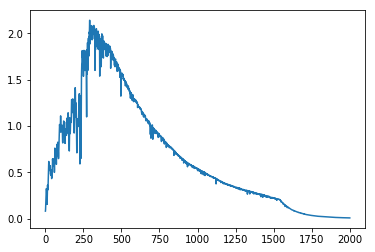

In [15]:
# The quick and easy way:
df2["Etr"].plot()

**A Pandas dataframe provides a plot method**, too. Look at the example:

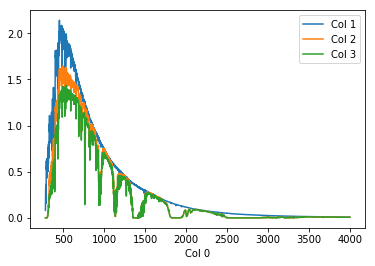

In [16]:
df1.plot(x = "Col 0", y = ["Col 1", "Col 2", "Col 3"])
plt.show()

To **gain more control in Pandas dataframe plotting** the `df.plot()` can be embedded in a `plt.figure()`. The trick is to pass the axis object (here named `ax1`) to the df.plot function.

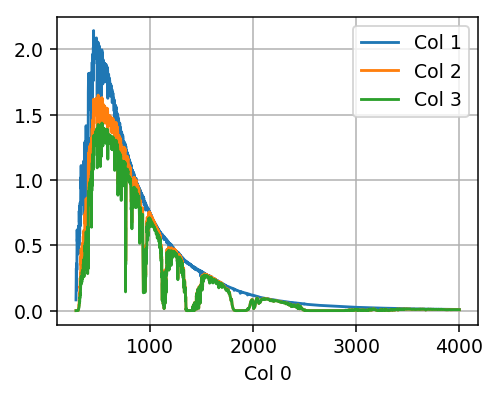

In [17]:
fig = plt.figure(figsize = (4,3), dpi = 136)
ax1 = fig.add_subplot(111)
h = df1.plot(x = "Col 0", y = ["Col 1", "Col 2", "Col 3"], ax = ax1)
ax1.grid(True)
plt.show()

This works also for a **Pandas series plotting**:

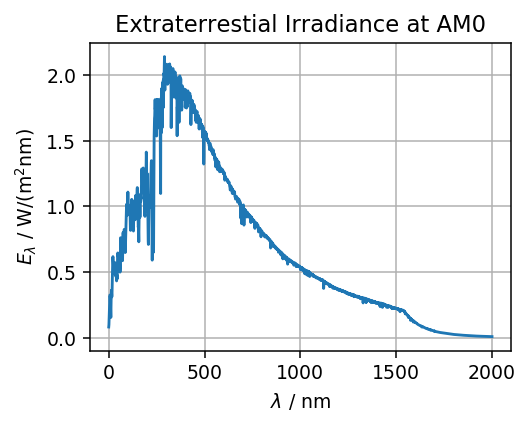

In [18]:
fig = plt.figure(figsize = (4,3), dpi = 136)
ax = fig.add_subplot(111)
ax.set_title("Extraterrestial Irradiance at AM0")
ax.set_xlabel("$\lambda$ / nm")
ax.set_ylabel("$E_\lambda$ / $\mathrm{W/(m^2 nm)}$")
df2["Etr"].plot(ax = ax, grid = True)
plt.show()

### Numerical Computing ###

**Pandas series behave similarly to numpy arrays!**

**Exercise:** Compute the spectral transmissivity from the data. Which columns would you use?

**Exercise:** Integrate the three spectral irradiance curves numerically with the trapezoid method.